In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import datetime
import seaborn as sns
sns.set(color_codes=True)
import geopandas as gp
from scipy import stats, integrate
import datetime
#Adjusts what can be displayed when calling a pandas dataframe|
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
Speed_Path = pd.read_csv('Z:/Jacob/SHRP2_Python_GPS/data/31W_231/Project_Data/US31/SHRP2Arterials_Path_Speed_2014_15Min.csv')
Speed_Point = pd.read_csv('Z:/Jacob/SHRP2_Python_GPS/data/31W_231/Project_Data/US31/SHRP2Arterials_Point_Speed_2014_15Min.csv')

Link_31W = pd.read_csv('Z:/Jacob/SHRP2_Python_GPS/data/31W_231/Project_Data/US31/US-31W_Path_Link_Sequence_2014.csv')
Link_231 = pd.read_csv('Z:/Jacob/SHRP2_Python_GPS/data/31W_231/Project_Data/US 231/US-231_Link_Sequence_2014.csv')

Speed_Path['Speed'] = Speed_Path['Speed']*0.6213
Speed_Point['Speed'] = Speed_Point['Speed']*0.6213

FileNotFoundError: File b'Z:/Jacob/SHRP2_Python_GPS/data/31W_231/Project_Data/US31/SHRP2Arterials_Path_Speed_2014_15Min.csv' does not exist

In [48]:
Link.Corridor.unique()

array(['US31W_SB', 'US31W_NB'], dtype=object)

In [13]:
Speed_Point.head()

,Corridor,LinkDir,LINK_ID,DIR_TRAVEL,Sequence,Length,LengthMile,DayType,EPOCH-15MIN,Time,Speed
0,US231_NB,106859098F,106859098,F,5,325.458,0.202,Fri,1,0:15,23.155851
1,US231_NB,106859098F,106859098,F,5,325.458,0.202,Fri,2,0:30,18.912372
2,US231_NB,106859098F,106859098,F,5,325.458,0.202,Fri,6,1:30,25.081881
3,US231_NB,106859098F,106859098,F,5,325.458,0.202,Fri,8,2:00,17.365335
4,US231_NB,106859098F,106859098,F,5,325.458,0.202,Fri,14,3:30,32.028015


In [14]:
#For now, enter the weekdays desire here in full
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Weekend = ['Saturday','Sunday']
Both = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [15]:
#w = Link, x = input dataframe, y = beginning timeframe (in epoch), z = ending timeframe (in epoch), 
#h = holiday (y or n), d = weekend or weekday
#Note the dataframe has to have an EPOCH-15MIN row to work.
def timeframe2(x,y,z,h,d):
    us_holidays = ['2014-01-01', '2014-05-26', 
                   '2014-07-04', '2014-09-01', '2014-11-27', 
                   '2014-11-28', '2014-12-25']
    if h == True:
        x['DATE'] = x['Date-Time'].str.split(' ').str[0]
        r = x[x['DATE'].isin(us_holidays)]
        v = x[~x.isin(r)].dropna()
        days = v[v['DOW'].isin(d)]
        Timeframe = days[(days['EPOCH-15MIN'] >= y) & (days['EPOCH-15MIN'] <= z)]
        return Timeframe
    else:
        x['DATE'] = x['Date-Time'].str.split(' ').str[0]
        days = x[x['DOW'].isin(d)]
        Timeframe = days[(days['EPOCH-15MIN'] >= y) & (days['EPOCH-15MIN'] <= z)]
        return Timeframe
    
#w = Link, x = input dataframe, y = beginning timeframe (in epoch), z = ending timeframe (in epoch), 
#h = holiday (y or n), d = weekend or weekday
#Note the dataframe has to have an EPOCH-15MIN row to work.
def timeframe3(x,y,z,d):
    if d == 'Weekday':
        f = ['Weekday']
    elif d == 'Weekend':
        f = ['Weekend']
    else:
        print("Please specify valid date range.")
    days = x[x['DayType'].isin(f)]
    Timeframe = days[(days['EPOCH-15MIN'] >= y) & (days['EPOCH-15MIN'] <= z)]
    return Timeframe

#w = Link, x = input dataframe, y = beginning timeframe (in epoch), z = ending timeframe (in epoch), 
#Note the dataframe has to have an EPOCH-15MIN row to work.
def timeframeWendHday(x,y,z):
    us_holidays = ['2014-01-01', '2014-05-26', 
                   '2014-07-04', '2014-09-01', '2014-11-27', 
                   '2014-11-28', '2014-12-25']

    d = ['Saturday','Sunday']
    x['DATE'] = x['Date-Time'].str.split(' ').str[0]
    r = x[x['DATE'].isin(us_holidays)] #This gets holidays
    v = x[x['DOW'].isin(d)] #This gets weekends
    days = pd.concat([r,v]) #This combines holidays and weekends
    Timeframe = days[(days['EPOCH-15MIN'] >= y) & (days['EPOCH-15MIN'] <= z)]
    return Timeframe

In [16]:
def copyrows_NB(frame):
    final_1 = pd.DataFrame()
    for i in range (0,len(Data_FilterNB)):
        concat = frame.loc[frame.index[i:(i+1)]]
        dff = pd.concat([concat]*int(Data_FilterNB.loc[i,"NumCopy"]), axis = 0,ignore_index = False)
        final_1 = final_1.append(dff)
    return final_1

In [17]:
def copyrows(frame,data_filter):
    final_1 = pd.DataFrame()
    for i in range (0,len(data_filter)):
        concat = frame.loc[frame.index[i:(i+1)]]
        df = pd.concat([concat]*int(data_filter.loc[i,"NumCopy"]), axis = 0,ignore_index = False)
        final_1 = final_1.append(df)
    return final_1

#loop to assign unique values within each timeframe
def unique_looper(df):
    final = pd.DataFrame()
    for x in range(0, int(df['EPOCH-15MIN'].max())+1):
        snip = df[(df['EPOCH-15MIN'] == x)] 
        snip = snip.reset_index()
        snip['unique'] = snip.index
        final = final.append(snip)
    final = final.rename(columns= {0:'Speed'})
    return final

In [33]:
def HM_Maker_Path_31W(S,L,x):
    #Gets data into joined format to relate speeds to the sequence of links.
    Data = pd.merge(S,L,on = 'LinkDir')
    Data = Data.drop('Unnamed: 0', axis = 1)
    Data = Data.reset_index(drop = True)
    
    #Creates the number of times a link must be copied to simulate length of link
    #Also, 0.001 corresponds to the selected minimum length of links in miles (ensures numbers are close to whole numbers)
    Data['NumCopy'] = Data['LengthMile']/0.001
    Data['NumCopy'] = Data['NumCopy'].round()
    
    #Creates Time Column for x axis
    Data['Time'] = Data['Date-Time'].str.split(' ').str[1]
    
    #Runs through logic to get either NB or SB dataset for heatmap.
    if x == 'North':
        Data_Dir = Data[Data['Corridor']=='US31W_NB']
    elif x == 'South':
        Data_Dir = Data[Data['Corridor']=='US31W_SB']
    else:
        print("This is not a valid direction for this function.  Please specify 'North' or 'South.'")
        Data = pd.DataFrame()
        return
    
    #Creates first pivot table for processing.
    Data_dir_Pivot = pd.pivot_table(Data_Dir, index = ['Sequence'], columns = ['EPOCH-15MIN','Time'], values = 'Speed')
    #Creates list of sequence to iterate for following steps.
    Data_Filter = Data_Dir[['Sequence','NumCopy']]
    Data_Filter = Data_Filter.drop_duplicates()
    Data_Filter = Data_Filter.sort_values('Sequence')
    Data_Filter = Data_Filter.reset_index(drop = True)
    
    #Uses copyrows function to create copies of each row by the length of the links.
    dff_dir = copyrows(Data_dir_Pivot,Data_Filter)
    #return dff_dir
    #Reformatting of dataframes to setup for unique designation function 
    dfff_dir = dff_dir.unstack()
    dfff_dir = dfff_dir.to_frame()
    dfff_dir = dfff_dir.reset_index()
    #return dfff_dir
    #Looping program to create unique identifiers for data
    Dir = unique_looper(dfff_dir)
    #return Dir
    #Creates pivot table for the heatmap
    pivot = pd.pivot_table(Dir, index = ['unique'], columns = ['EPOCH-15MIN','Time'], values = 'Speed')
    if x == 'North':
       pivot = pivot.sort_index(ascending = False)
    else:
       pivot = pivot.sort_index(ascending = True)
    
    #Creates Heatmap.
    fig, ax = plt.subplots()
    #fig size numbers are in inches on a sheet of paper.
    fig.set_size_inches(10, 10)
    Heatmap = sns.heatmap(pivot, vmin = 0, vmax = 50, cmap = 'RdYlGn',xticklabels = 4, yticklabels = False, ax=ax)
    if x == "North":
        Heatmap.set_title('Northbound Heatmap US31W')
    else:
        Heatmap.set_title('Southbound Heatmap US31W')
    return Heatmap

In [42]:
def HM_Maker_Path_231(S,L,x):
     #Gets data into joined format to relate speeds to the sequence of links.
    Data = pd.merge(S,L,on = 'LinkDir')
    Data = Data.drop('Unnamed: 0', axis = 1)
    Data = Data.reset_index(drop = True)
    
    #Creates the number of times a link must be copied to simulate length of link
    #Also, 0.001 corresponds to the selected minimum length of links in miles (ensures numbers are close to whole numbers)
    Data['NumCopy'] = Data['LengthMile']/0.001
    Data['NumCopy'] = Data['NumCopy'].round()
    
    #Creates Time Column for x axis
    Data['Time'] = Data['Date-Time'].str.split(' ').str[1]
    
    #Runs through logic to get either NB or SB dataset for heatmap.
    if x == 'North':
        Data_Dir = Data[Data['Corridor']=='US231_NB']
    elif x == 'South':
        Data_Dir = Data[Data['Corridor']=='US231_SB']
    else:
        print("This is not a valid direction for this function.  Please specify 'North' or 'South.'")
        Data = pd.DataFrame()
        return
    
    #Creates first pivot table for processing.
    Data_dir_Pivot = pd.pivot_table(Data_Dir, index = ['Sequence'], columns = ['EPOCH-15MIN','Time'], values = 'Speed')
    #Creates list of sequence to iterate for following steps.
    Data_Filter = Data_Dir[['Sequence','NumCopy']]
    Data_Filter = Data_Filter.drop_duplicates()
    Data_Filter = Data_Filter.sort_values('Sequence')
    Data_Filter = Data_Filter.reset_index(drop = True)
    
    #Uses copyrows function to create copies of each row by the length of the links.
    dff_dir = copyrows(Data_dir_Pivot,Data_Filter)
    #return dff_dir
    #Reformatting of dataframes to setup for unique designation function 
    dfff_dir = dff_dir.unstack()
    dfff_dir = dfff_dir.to_frame()
    dfff_dir = dfff_dir.reset_index()
    #return dfff_dir
    #Looping program to create unique identifiers for data
    Dir = unique_looper(dfff_dir)
    #return Dir
    #Creates pivot table for the heatmap
    pivot = pd.pivot_table(Dir, index = ['unique'], columns = ['EPOCH-15MIN','Time'], values = 'Speed')
    if x == 'North':
       pivot = pivot.sort_index(ascending = False)
    else:
       pivot = pivot.sort_index(ascending = True)
    
    #Creates Heatmap.
    fig, ax = plt.subplots()
    #fig size numbers are in inches on a sheet of paper.
    fig.set_size_inches(10, 10)
    Heatmap = sns.heatmap(pivot, vmin = 0, vmax = 50, cmap = 'RdYlGn',xticklabels = 4, yticklabels = False, ax=ax)
    if x == "North":
        Heatmap.set_title('Northbound Heatmap US31W')
    else:
        Heatmap.set_title('Southbound Heatmap US31W')
    return Heatmap

In [43]:
#w is the speed dataset, x is the Link Data, and y is the direction 'North' or 'South'
def Weekday_HM_231(w,x,y):
    z = timeframe2(w,0,96,True,Weekday)
    HM = HM_Maker_Path_231(z,x,y)
    HM.set_ylabel('')
    HM.set_yticks([3125-1, 3125-272, 3125-953, 3125-1221, 3125-1368, 3125-1718, 3125-2081, 3125-2502, 3125-2704,
                   3125-2925, 3125-3124,])

    HM.set_yticklabels(['US31W BYP','Covington St','Wilkinson Tr','Ashley St','Woodhurst St','Gary Farm Blvd',
                        'Campbell Ln','Bryant Way','Cave Mill Rd','Pascoe Blvd','Ken Bale Blvd'])

    return HM

In [44]:
#w is the speed dataset, x is the Link Data, and y is the direction 'North' or 'South'
def Weekend_HM_231(w,x,y):
    z = timeframe2(w,0,96,True,Weekend)
    HM = HM_Maker_Path_231(z,x,y)
    HM.set_ylabel('')
    HM.set_yticks([3125-1, 3125-272, 3125-953, 3125-1221, 3125-1368, 3125-1718, 3125-2081, 3125-2502, 3125-2704,
                   3125-2925, 3125-3124,])

    HM.set_yticklabels(['US31W BYP','Covington St','Wilkinson Tr','Ashley St','Woodhurst St','Gary Farm Blvd',
                        'Campbell Ln','Bryant Way','Cave Mill Rd','Pascoe Blvd','Ken Bale Blvd'])

    return HM

In [45]:
#w is the speed dataset, x is the Link Data, and y is the direction 'North' or 'South'
def Weekday_HM_31W(w,x,y):
    z = timeframe2(w,0,96,True,Weekday)
    HM = HM_Maker_Path_31W(z,x,y)
    HM.set_ylabel('')
    HM.set_yticks([11135-1, 11135-566, 11135-1739, 11135-2411, 11135-3346, 11135-3761, 11135-5173, 11135-6087, 11135-6619,
               11135-6982, 11135-7313,
               11135-7554, 11135-7847, 11135-8276, 11135-8949, 11135-9731, 11135-10083, 11135-10386, 
               11135-10819, 11135-11057, 11135-11134])

    HM.set_yticklabels(['Lincoln Trl Blvd','KY144','Blackjack Rd','Centennial Ave','KY313','KY434','KY220','Teresa Rd',
                    'Pine Valley Dr','Wilson Rd','Verterans Way','Childers Ct','Kmart Center Dr',
                    'Ring Rd','US31W BYP','Diecks Dr','St John Rd','Mantle Ave','Miles St','Mulberry St','Main St'])

    return HM

In [46]:
#w is the speed dataset, x is the Link Data, and y is the direction 'North' or 'South'
def Weekend_HM_31W(w,x,y):
    z = timeframe2(w,0,96,True,Weekend)
    HM = HM_Maker_Path_31W(z,x,y)
    HM.set_ylabel('')
    HM.set_yticks([11135-1, 11135-566, 11135-1739, 11135-2411, 11135-3346, 11135-3761, 11135-5173, 11135-6087, 11135-6619,
               11135-6982, 11135-7313,
               11135-7554, 11135-7847, 11135-8276, 11135-8949, 11135-9731, 11135-10083, 11135-10386, 
               11135-10819, 11135-11057, 11135-11134])

    HM.set_yticklabels(['Lincoln Trl Blvd','KY144','Blackjack Rd','Centennial Ave','KY313','KY434','KY220','Teresa Rd',
                    'Pine Valley Dr','Wilson Rd','Verterans Way','Childers Ct','Kmart Center Dr',
                    'Ring Rd','US31W BYP','Diecks Dr','St John Rd','Mantle Ave','Miles St','Mulberry St','Main St'])

    return HM

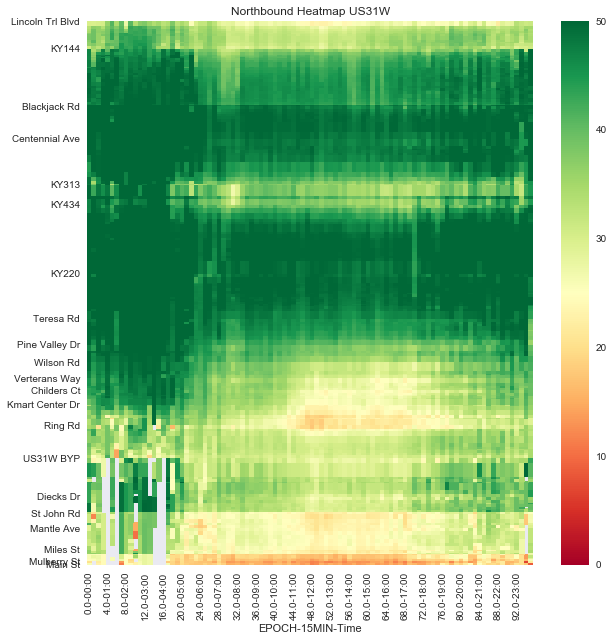

In [73]:
Map = Weekday_HM_31W(Speed_Path,Link_31W,'North')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/31W/Northbound_Heatmap_Weekday_Path_31W.png")

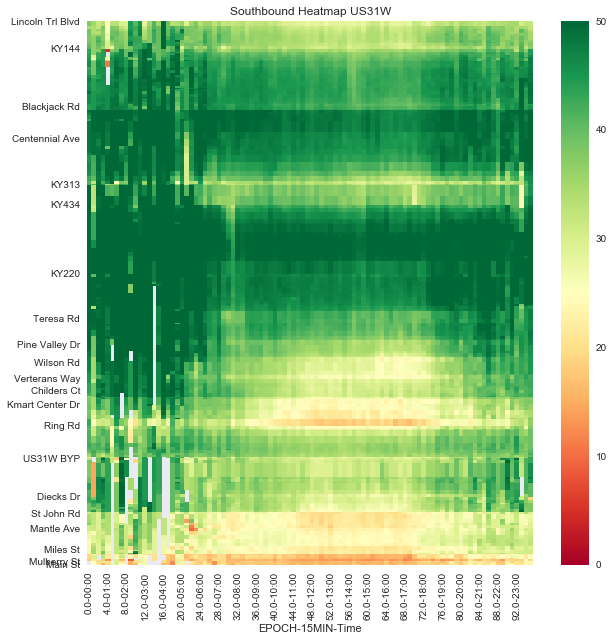

In [74]:
Map = Weekday_HM_31W(Speed_Path,Link_31W,'South')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/31W/Southbound_Heatmap_Weekday_Path_31W.png")

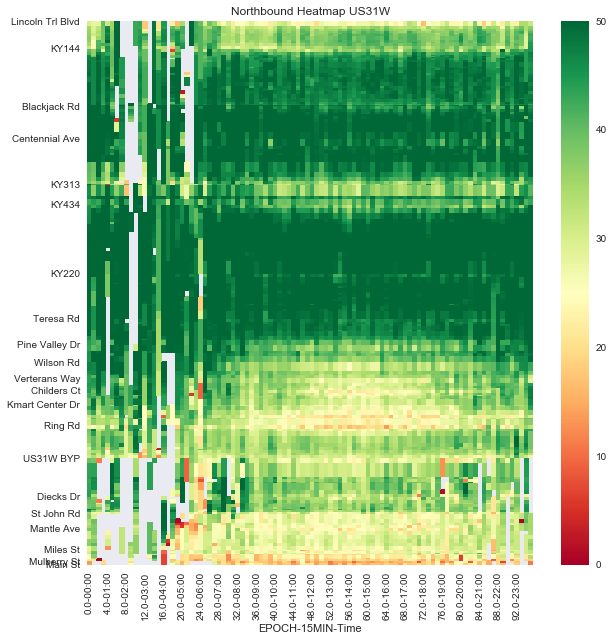

In [75]:
Map = Weekend_HM_31W(Speed_Path,Link_31W,'North')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/31W/Northbound_Heatmap_Weekend_Path_31W.png")

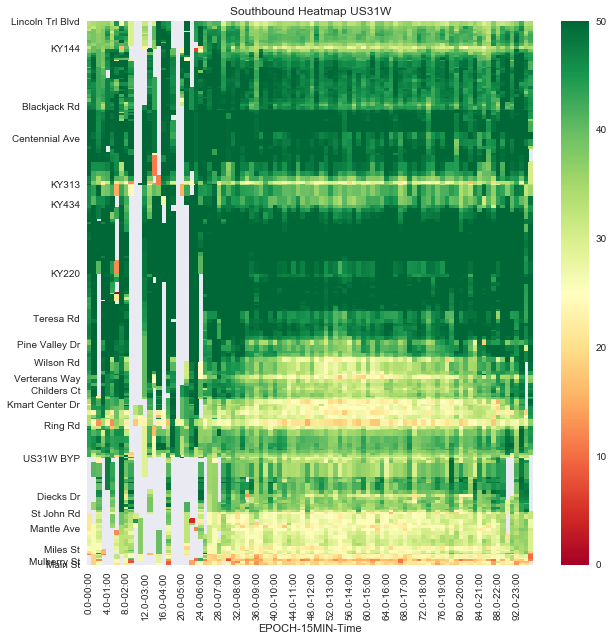

In [76]:
Map = Weekend_HM_31W(Speed_Path,Link_31W,'South')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/31W/Southbound_Heatmap_Weekend_Path_31W.png")

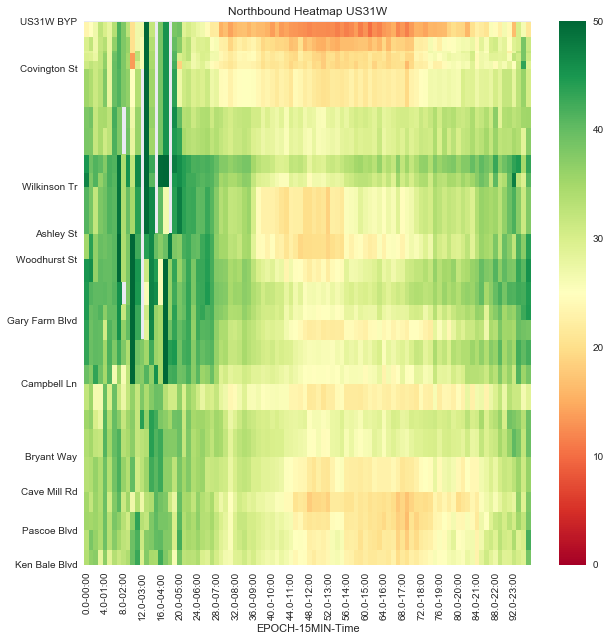

In [77]:
Map = Weekday_HM_231(Speed_Path,Link_231,'North')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/231/Northbound_Heatmap_Weekday_Path_231.png")

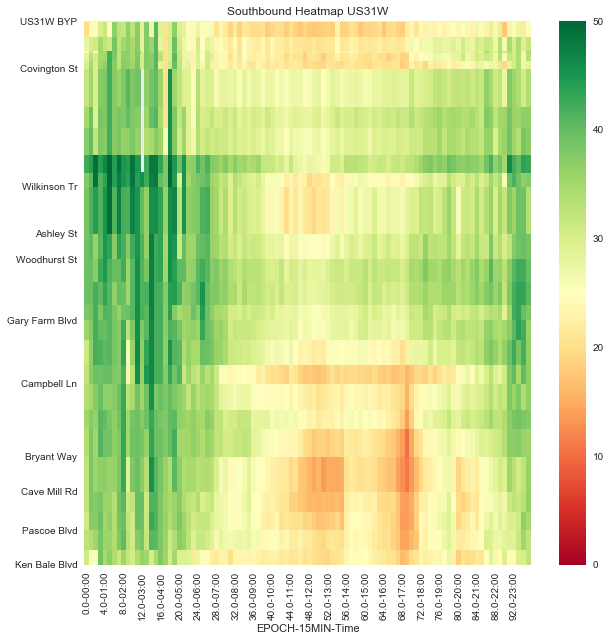

In [78]:
Map = Weekday_HM_231(Speed_Path,Link_231,'South')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/231/Southbound_Heatmap_Weekday_Path_231.png")

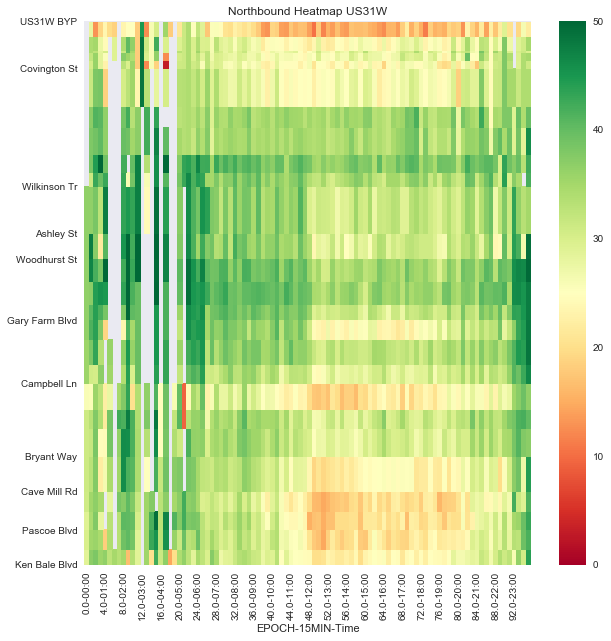

In [79]:
Map = Weekend_HM_231(Speed_Path,Link_231,'North')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/231/Northbound_Heatmap_Weekend_Path_231.png")

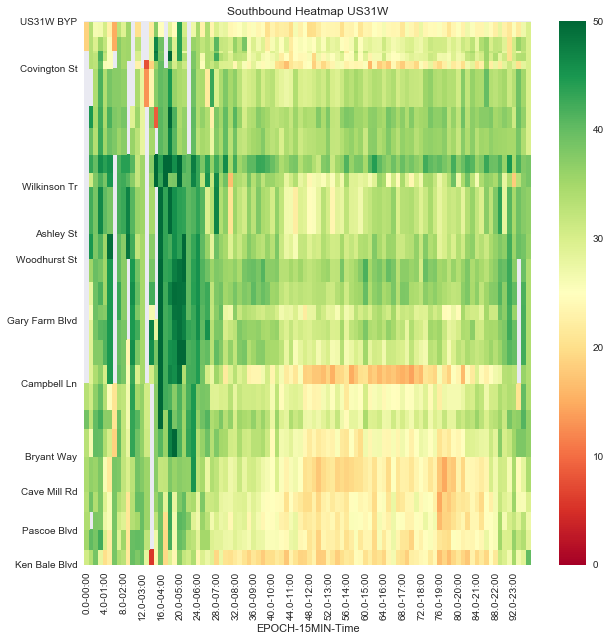

In [80]:
Map = Weekend_HM_231(Speed_Path,Link_231,'South')
fig = Map.get_figure()
fig.savefig("Pictures/Heatmaps/231/Southbound_Heatmap_Weekend_Path_231.png")

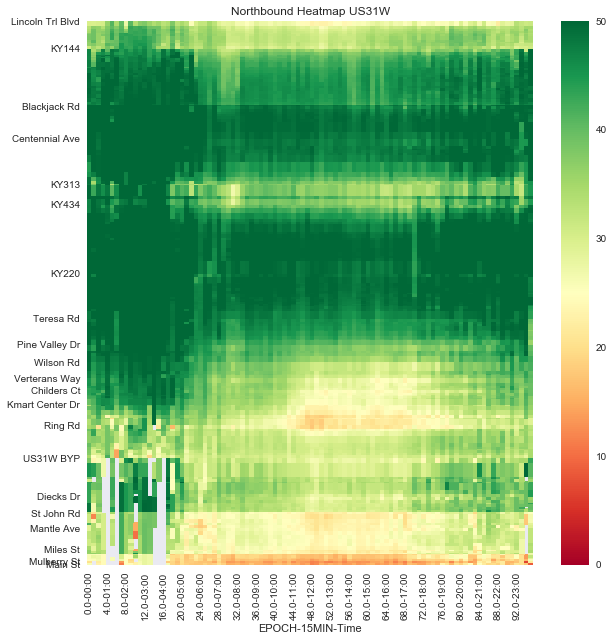

In [298]:
Speed_Wkd_Path = timeframe2(Speed_Path,0,96,True,Weekday)
HM = HM_Maker_Path(Speed_Wkd_Path, Link, 'North')
HM.set_ylabel('')
HM.set_yticks([11135-1, 11135-566, 11135-1739, 11135-2411, 11135-3346, 11135-3761, 11135-5173, 11135-6087, 11135-6619,
               11135-6982, 11135-7313,
               11135-7554, 11135-7847, 11135-8276, 11135-8949, 11135-9731, 11135-10083, 11135-10386, 
               11135-10819, 11135-11057, 11135-11134])
#HM.set_yticklabels(['Main St', 'Mulberry St','Miles St','Mantle Ave','St John Rd',
                    #'Diecks Dr','US31W BYP','Ring Rd','Kmart Center Dr','Childers Ct','Verterans Way','Wilson Rd',
                    #'Pine Valley Dr','Teresa Rd','KY220','KY434','KY313','Centennial Ave','Blackjack Rd','KY144',
                    #'Lincoln Trl Blvd'])
HM.set_yticklabels(['Lincoln Trl Blvd','KY144','Blackjack Rd','Centennial Ave','KY313','KY434','KY220','Teresa Rd',
                    'Pine Valley Dr','Wilson Rd','Verterans Way','Childers Ct','Kmart Center Dr',
                    'Ring Rd','US31W BYP','Diecks Dr','St John Rd','Mantle Ave','Miles St','Mulberry St','Main St'])
HM
fig = HM.get_figure()
fig.savefig("Northbound_Heatmap_Weekday_Path.png")

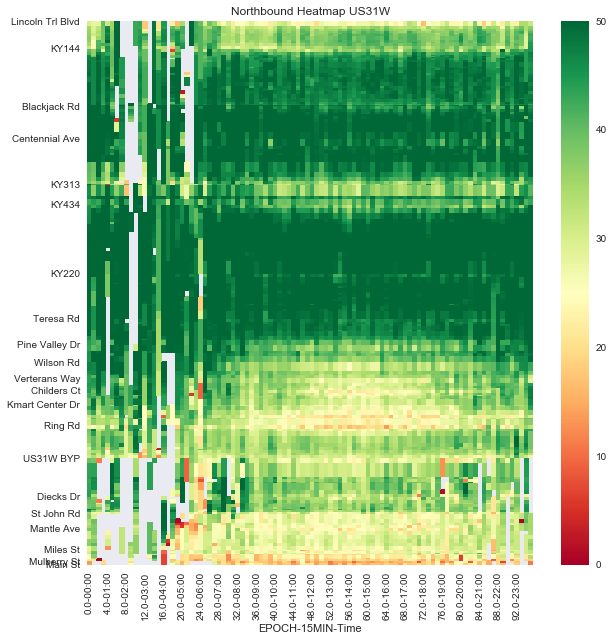

In [299]:
Speed_Wend_Path = timeframe2(Speed_Path,0,96,True,Weekend)
HM = HM_Maker_Path(Speed_Wend_Path, Link, 'North')
HM.set_ylabel('')
HM.set_yticks([11135-1, 11135-566, 11135-1739, 11135-2411, 11135-3346, 11135-3761, 11135-5173, 11135-6087, 11135-6619,
               11135-6982, 11135-7313,
               11135-7554, 11135-7847, 11135-8276, 11135-8949, 11135-9731, 11135-10083, 11135-10386, 
               11135-10819, 11135-11057, 11135-11134])
#HM.set_yticklabels(['Main St', 'Mulberry St','Miles St','Mantle Ave','St John Rd',
                    #'Diecks Dr','US31W BYP','Ring Rd','Kmart Center Dr','Childers Ct','Verterans Way','Wilson Rd',
                    #'Pine Valley Dr','Teresa Rd','KY220','KY434','KY313','Centennial Ave','Blackjack Rd','KY144',
                    #'Lincoln Trl Blvd'])
HM.set_yticklabels(['Lincoln Trl Blvd','KY144','Blackjack Rd','Centennial Ave','KY313','KY434','KY220','Teresa Rd',
                    'Pine Valley Dr','Wilson Rd','Verterans Way','Childers Ct','Kmart Center Dr',
                    'Ring Rd','US31W BYP','Diecks Dr','St John Rd','Mantle Ave','Miles St','Mulberry St','Main St'])
HM
fig = HM.get_figure()
fig.savefig("Northbound_Heatmap_Weekend_Path.png")

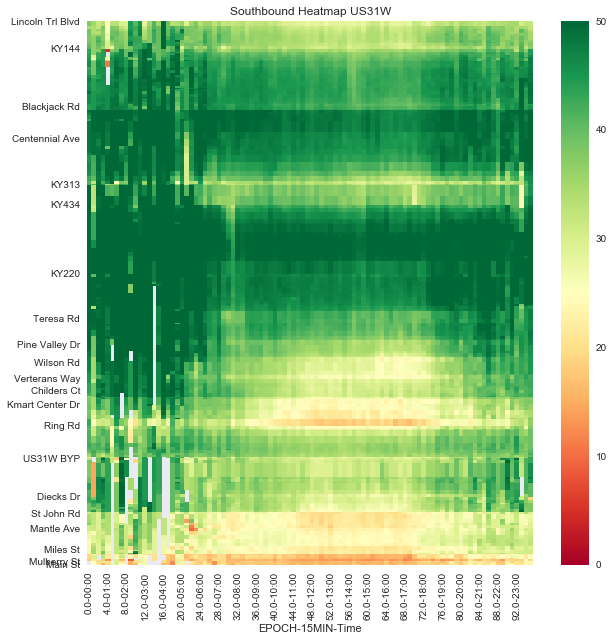

In [300]:
Speed_Wkd_Path = timeframe2(Speed_Path,0,96,True,Weekday)
HM = HM_Maker_Path(Speed_Wkd, Link, 'South')
HM.set_ylabel('')
HM.set_yticks([11135-1, 11135-566, 11135-1739, 11135-2411, 11135-3346, 11135-3761, 11135-5173, 11135-6087, 11135-6619,
               11135-6982, 11135-7313,
               11135-7554, 11135-7847, 11135-8276, 11135-8949, 11135-9731, 11135-10083, 11135-10386, 
               11135-10819, 11135-11057, 11135-11134])
#HM.set_yticklabels(['Main St', 'Mulberry St','Miles St','Mantle Ave','St John Rd',
                    #'Diecks Dr','US31W BYP','Ring Rd','Kmart Center Dr','Childers Ct','Verterans Way','Wilson Rd',
                    #'Pine Valley Dr','Teresa Rd','KY220','KY434','KY313','Centennial Ave','Blackjack Rd','KY144',
                    #'Lincoln Trl Blvd'])
HM.set_yticklabels(['Lincoln Trl Blvd','KY144','Blackjack Rd','Centennial Ave','KY313','KY434','KY220','Teresa Rd',
                    'Pine Valley Dr','Wilson Rd','Verterans Way','Childers Ct','Kmart Center Dr',
                    'Ring Rd','US31W BYP','Diecks Dr','St John Rd','Mantle Ave','Miles St','Mulberry St','Main St'])
HM
fig = HM.get_figure()
fig.savefig("Southbound_Heatmap_Weekday_Path.png")

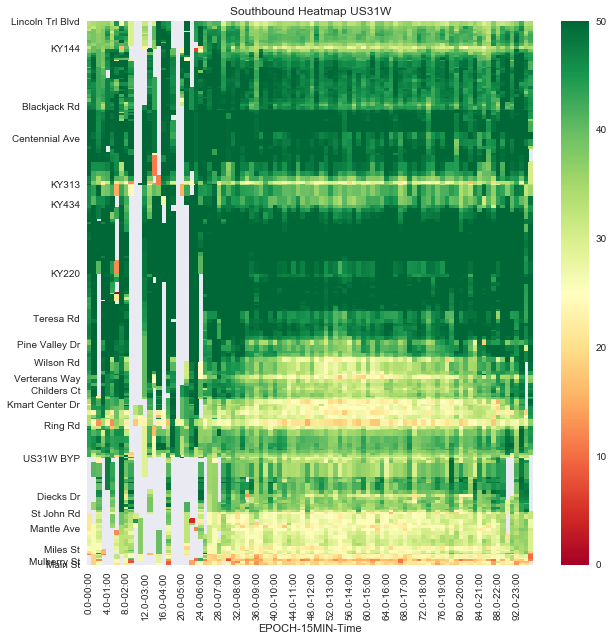

In [301]:
Speed_Wend_Path = timeframe2(Speed_Path,0,96,True,Weekend)
HM = HM_Maker_Path(Speed_Wend_Path, Link, 'South')
HM.set_ylabel('')
HM.set_yticks([11135-1, 11135-566, 11135-1739, 11135-2411, 11135-3346, 11135-3761, 11135-5173, 11135-6087, 11135-6619,
               11135-6982, 11135-7313,
               11135-7554, 11135-7847, 11135-8276, 11135-8949, 11135-9731, 11135-10083, 11135-10386, 
               11135-10819, 11135-11057, 11135-11134])
#HM.set_yticklabels(['Main St', 'Mulberry St','Miles St','Mantle Ave','St John Rd',
                    #'Diecks Dr','US31W BYP','Ring Rd','Kmart Center Dr','Childers Ct','Verterans Way','Wilson Rd',
                    #'Pine Valley Dr','Teresa Rd','KY220','KY434','KY313','Centennial Ave','Blackjack Rd','KY144',
                    #'Lincoln Trl Blvd'])
HM.set_yticklabels(['Lincoln Trl Blvd','KY144','Blackjack Rd','Centennial Ave','KY313','KY434','KY220','Teresa Rd',
                    'Pine Valley Dr','Wilson Rd','Verterans Way','Childers Ct','Kmart Center Dr',
                    'Ring Rd','US31W BYP','Diecks Dr','St John Rd','Mantle Ave','Miles St','Mulberry St','Main St'])
HM
fig = HM.get_figure()
fig.savefig("Southbound_Heatmap_Weekend_Path.png")

In [302]:
#The following are the testing ground for the above functions.  Revert if necessary

In [295]:
Speed['Speed'] = Speed['Speed']*0.6213

In [56]:
Data = pd.merge(Speed_Path,Link_231,on = 'LinkDir')

In [57]:
Data = Data.drop('Unnamed: 0', axis = 1)

In [58]:
Data = Data.reset_index()

In [59]:
#Minimum value used for number of copies for links is 0.001 miles
Data['NumCopy'] = Data['LengthMile']/0.001
Data['NumCopy'] = Data['NumCopy'].round()
Data.head()

,index,LinkDir,Date-Time,EPOCH-15MIN,Length_x,Speed,Confidence,DOW,Corridor,LINK_ID,ST_NAME,DIR_TRAVEL,POINT_X,POINT_Y,Sequence,Length_y,LengthMile,NumCopy
0,0,786372076T,2014-01-01 07:15,29,212,40.3845,10,Wednesday,US231_SB,786372076,SCOTTSVILLE RD,T,-86.43078,36.96237,15,211.514,0.131,131.0
1,1,786372076T,2014-01-01 09:45,39,212,49.7040,10,Wednesday,US231_SB,786372076,SCOTTSVILLE RD,T,-86.43078,36.96237,15,211.514,0.131,131.0
2,2,786372076T,2014-01-01 13:30,54,212,26.0946,10,Wednesday,US231_SB,786372076,SCOTTSVILLE RD,T,-86.43078,36.96237,15,211.514,0.131,131.0
3,3,786372076T,2014-01-01 15:45,63,212,47.2188,30,Wednesday,US231_SB,786372076,SCOTTSVILLE RD,T,-86.43078,36.96237,15,211.514,0.131,131.0
4,4,786372076T,2014-01-01 23:45,95,212,45.9762,10,Wednesday,US231_SB,786372076,SCOTTSVILLE RD,T,-86.43078,36.96237,15,211.514,0.131,131.0


In [54]:
Data['Time'] = Data['Date-Time'].str.split(' ').str[1]
Data.head()

,index,LinkDir,Date-Time,EPOCH-15MIN,Length,Speed,Confidence,DOW,Corridor,LINK_ID,ST_NAME,DIR_TRAVEL,Sequence,LengthMile,NumCopy,Time
0,0,1068716170T,2014-01-01 11:30,46,46,32.9289,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,11:30
1,1,1068716170T,2014-01-01 11:45,47,46,36.0354,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,11:45
2,2,1068716170T,2014-01-01 13:45,55,46,37.2780,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,13:45
3,3,1068716170T,2014-01-01 14:30,58,46,36.0354,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,14:30
4,4,1068716170T,2014-01-02 09:15,37,46,27.9585,10,Thursday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,09:15


In [55]:
Data_NB = Data[Data['Corridor']=='US31W_NB']
Data_SB = Data[Data['Corridor']=='US31W_SB']

In [56]:
Data_NB.head()

,index,LinkDir,Date-Time,EPOCH-15MIN,Length,Speed,Confidence,DOW,Corridor,LINK_ID,ST_NAME,DIR_TRAVEL,Sequence,LengthMile,NumCopy,Time
3759,3759,1068716170F,2014-01-01 10:00,40,46,45.9762,10,Wednesday,US31W_NB,1068716170,W DIXIE AVE,F,22,0.026,26.0,10:00
3760,3760,1068716170F,2014-01-02 09:30,38,46,31.0650,10,Thursday,US31W_NB,1068716170,W DIXIE AVE,F,22,0.026,26.0,09:30
3761,3761,1068716170F,2014-01-02 12:15,49,46,27.3372,10,Thursday,US31W_NB,1068716170,W DIXIE AVE,F,22,0.026,26.0,12:15
3762,3762,1068716170F,2014-01-02 12:30,50,46,33.5502,20,Thursday,US31W_NB,1068716170,W DIXIE AVE,F,22,0.026,26.0,12:30
3763,3763,1068716170F,2014-01-02 13:00,52,46,38.5206,10,Thursday,US31W_NB,1068716170,W DIXIE AVE,F,22,0.026,26.0,13:00


In [57]:
Data_SB.head()

,index,LinkDir,Date-Time,EPOCH-15MIN,Length,Speed,Confidence,DOW,Corridor,LINK_ID,ST_NAME,DIR_TRAVEL,Sequence,LengthMile,NumCopy,Time
0,0,1068716170T,2014-01-01 11:30,46,46,32.9289,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,11:30
1,1,1068716170T,2014-01-01 11:45,47,46,36.0354,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,11:45
2,2,1068716170T,2014-01-01 13:45,55,46,37.2780,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,13:45
3,3,1068716170T,2014-01-01 14:30,58,46,36.0354,10,Wednesday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,14:30
4,4,1068716170T,2014-01-02 09:15,37,46,27.9585,10,Thursday,US31W_SB,1068716170,N DIXIE AVE,T,155,0.026,26.0,09:15


In [58]:
Data_FilterNB = Data_NB[['Sequence','NumCopy']]
Data_FilterNB = Data_FilterNB.drop_duplicates()
Data_FilterNB = Data_FilterNB.sort_values('Sequence')
Data_FilterNB = Data_FilterNB.reset_index(drop = True)
Data_FilterNB

,Sequence,NumCopy
0,1,34.0
1,2,43.0
2,3,51.0
3,4,24.0
4,5,59.0
5,6,18.0
6,7,16.0
7,8,39.0
8,9,32.0
9,10,78.0


In [59]:
Data_FilterSB = Data_SB[['Sequence','NumCopy']]
Data_FilterSB = Data_FilterSB.drop_duplicates()
Data_FilterSB = Data_FilterSB.sort_values('Sequence')
Data_FilterSB = Data_FilterSB.reset_index(drop = True)
Data_FilterSB

,Sequence,NumCopy
0,1,95.0
1,2,51.0
2,3,44.0
3,4,46.0
4,5,28.0
5,6,40.0
6,7,73.0
7,8,34.0
8,9,25.0
9,10,74.0


In [60]:
DataNB_Pivot = pd.pivot_table(Data_NB, index = ['Sequence'], columns = ['Time','EPOCH-15MIN'], values = 'Speed')
DataSB_Pivot = pd.pivot_table(Data_SB, index = ['Sequence'], columns = ['Time','EPOCH-15MIN'], values = 'Speed')

In [61]:
def copyrows_NB(frame):
    final_1 = pd.DataFrame()
    for i in range (0,len(Data_FilterNB)):
        concat = frame.loc[frame.index[i:(i+1)]]
        dff = pd.concat([concat]*int(Data_FilterNB.loc[i,"NumCopy"]), axis = 0,ignore_index = False)
        final_1 = final_1.append(dff)
    return final_1

In [62]:
def copyrows_SB(frame):
    final_1 = pd.DataFrame()
    for i in range (0,len(Data_FilterSB)):
        concat = frame.loc[frame.index[i:(i+1)]]
        dff = pd.concat([concat]*int(Data_FilterSB.loc[i,"NumCopy"]), axis = 0,ignore_index = False)
        final_1 = final_1.append(dff)
    return final_1

In [63]:
dff_NB = copyrows_NB(DataNB_Pivot)
len(dff_NB)

11135

In [64]:
dff_SB = copyrows_SB(DataSB_Pivot)
len(dff_SB)

11135

In [65]:
dff_NB.head()

Time,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
EPOCH-15MIN,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
Sequence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20.81355,NaN,22.832775,21.7455,NaN,NaN,NaN,11.1834,25.16265,24.696675,22.9881,26.0946,27.9585,27.3372,NaN,NaN,6.8343,26.3017,19.605467,18.639,19.765868,18.644974,17.869771,17.539777,17.578505,18.866013,17.6035,18.652507,20.752935,18.703072,15.43229,15.155282,16.230723,15.087882,15.923031,17.979816,16.110453,16.512242,15.521788,14.731713,16.896329,16.520932,15.679353,16.792285,14.619966,15.006668,14.084393,15.530015,11.993127,12.643455,15.755132,14.272316,14.723331,14.40047,15.735717,13.256057,14.64197,15.001806,13.493506,14.033276,14.940098,16.501728,14.322259,14.685503,14.142833,15.684373,14.437829,15.087515,14.873922,16.633895,16.46445,15.167824,15.1183,17.172042,18.1485,16.908236,22.017319,21.383075,16.41089,21.967393,19.2603,20.885238,23.98218,19.482193,22.3668,21.93189,18.32835,19.8816,18.94965,18.2248,15.998475,17.3964,20.5029,20.5029,17.3964,9.9408
1,20.81355,NaN,22.832775,21.7455,NaN,NaN,NaN,11.1834,25.16265,24.696675,22.9881,26.0946,27.9585,27.3372,NaN,NaN,6.8343,26.3017,19.605467,18.639,19.765868,18.644974,17.869771,17.539777,17.578505,18.866013,17.6035,18.652507,20.752935,18.703072,15.43229,15.155282,16.230723,15.087882,15.923031,17.979816,16.110453,16.512242,15.521788,14.731713,16.896329,16.520932,15.679353,16.792285,14.619966,15.006668,14.084393,15.530015,11.993127,12.643455,15.755132,14.272316,14.723331,14.40047,15.735717,13.256057,14.64197,15.001806,13.493506,14.033276,14.940098,16.501728,14.322259,14.685503,14.142833,15.684373,14.437829,15.087515,14.873922,16.633895,16.46445,15.167824,15.1183,17.172042,18.1485,16.908236,22.017319,21.383075,16.41089,21.967393,19.2603,20.885238,23.98218,19.482193,22.3668,21.93189,18.32835,19.8816,18.94965,18.2248,15.998475,17.3964,20.5029,20.5029,17.3964,9.9408
1,20.81355,NaN,22.832775,21.7455,NaN,NaN,NaN,11.1834,25.16265,24.696675,22.9881,26.0946,27.9585,27.3372,NaN,NaN,6.8343,26.3017,19.605467,18.639,19.765868,18.644974,17.869771,17.539777,17.578505,18.866013,17.6035,18.652507,20.752935,18.703072,15.43229,15.155282,16.230723,15.087882,15.923031,17.979816,16.110453,16.512242,15.521788,14.731713,16.896329,16.520932,15.679353,16.792285,14.619966,15.006668,14.084393,15.530015,11.993127,12.643455,15.755132,14.272316,14.723331,14.40047,15.735717,13.256057,14.64197,15.001806,13.493506,14.033276,14.940098,16.501728,14.322259,14.685503,14.142833,15.684373,14.437829,15.087515,14.873922,16.633895,16.46445,15.167824,15.1183,17.172042,18.1485,16.908236,22.017319,21.383075,16.41089,21.967393,19.2603,20.885238,23.98218,19.482193,22.3668,21.93189,18.32835,19.8816,18.94965,18.2248,15.998475,17.3964,20.5029,20.5029,17.3964,9.9408
1,20.81355,NaN,22.832775,21.7455,NaN,NaN,NaN,11.1834,25.16265,24.696675,22.9881,26.0946,27.9585,27.3372,NaN,NaN,6.8343,26.3017,19.605467,18.639,19.765868,18.644974,17.869771,17.539777,17.578505,18.866013,17.6035,18.652507,20.752935,18.703072,15.43229,15.155282,16.230723,15.087882,15.923031,17.979816,16.110453,16.512242,15.521788,14.731713,16.896329,16.520932,15.679353,16.792285,14.619966,15.006668,14.084393,15.

In [66]:
dff_SB.head()

Time,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
EPOCH-15MIN,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
Sequence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,35.74546,34.881557,33.380755,33.769482,30.521362,33.09458,35.362325,28.234633,32.424094,41.6271,40.772812,45.3549,29.278762,35.10345,37.943679,38.5206,48.15075,40.739529,33.3431,33.783187,35.282074,32.191106,35.31055,38.637094,34.376529,36.601739,36.301671,33.402641,35.141334,31.956866,32.906218,32.647042,32.807826,33.096306,31.963495,32.153886,31.968659,31.907329,32.438705,31.579029,32.673577,31.318808,30.136933,30.334664,29.689264,29.712378,29.509733,28.856244,28.459838,28.92844,29.293365,28.043044,29.811231,29.282999,29.046871,29.308052,28.508206,28.366347,29.145425,28.148627,30.733209,31.505868,31.963592,29.038945,30.870593,29.41305,28.257152,28.535996,29.974056,28.631909,31.850376,31.712643,30.274255,28.483021,31.294737,32.533982,32.31115,30.914113,33.952465,32.233044,34.843518,33.929193,33.472538,32.856415,32.795764,30.995967,33.293576,35.066172,33.826333,33.090978,33.824303,34.90725,35.301136,33.749904,32.695913,32.65877
1,35.74546,34.881557,33.380755,33.769482,30.521362,33.09458,35.362325,28.234633,32.424094,41.6271,40.772812,45.3549,29.278762,35.10345,37.943679,38.5206,48.15075,40.739529,33.3431,33.783187,35.282074,32.191106,35.31055,38.637094,34.376529,36.601739,36.301671,33.402641,35.141334,31.956866,32.906218,32.647042,32.807826,33.096306,31.963495,32.153886,31.968659,31.907329,32.438705,31.579029,32.673577,31.318808,30.136933,30.334664,29.689264,29.712378,29.509733,28.856244,28.459838,28.92844,29.293365,28.043044,29.811231,29.282999,29.046871,29.308052,28.508206,28.366347,29.145425,28.148627,30.733209,31.505868,31.963592,29.038945,30.870593,29.41305,28.257152,28.535996,29.974056,28.631909,31.850376,31.712643,30.274255,28.483021,31.294737,32.533982,32.31115,30.914113,33.952465,32.233044,34.843518,33.929193,33.472538,32.856415,32.795764,30.995967,33.293576,35.066172,33.826333,33.090978,33.824303,34.90725,35.301136,33.749904,32.695913,32.65877
1,35.74546,34.881557,33.380755,33.769482,30.521362,33.09458,35.362325,28.234633,32.424094,41.6271,40.772812,45.3549,29.278762,35.10345,37.943679,38.5206,48.15075,40.739529,33.3431,33.783187,35.282074,32.191106,35.31055,38.637094,34.376529,36.601739,36.301671,33.402641,35.141334,31.956866,32.906218,32.647042,32.807826,33.096306,31.963495,32.153886,31.968659,31.907329,32.438705,31.579029,32.673577,31.318808,30.136933,30.334664,29.689264,29.712378,29.509733,28.856244,28.459838,28.92844,29.293365,28.043044,29.811231,29.282999,29.046871,29.308052,28.508206,28.366347,29.145425,28.148627,30.733209,31.505868,31.963592,29.038945,30.870593,29.41305,28.257152,28.535996,29.974056,28.631909,31.850376,31.712643,30.274255,28.483021,31.294737,32.533982,32.31115,30.914113,33.952465,32.233044,34.843518,33.929193,33.472538,32.856415,32.795764,30.995967,33.293576,35.066172,33.826333,33.090978,33.824303,34.90725,35.301136,33.749904,32.695913,32.65877
1,35.74546,34.881557,33.380755,33.769482,30.521362,33.09458,35.362325,28.234633,32.424094,41.6271,40.772812,45.3549,29.278762,35.10345,37.943679,38.5206,48.15075,40.739529,33.3431,33.783187,35

In [67]:
#setup for unique designation
dfff_NB = dff_NB.unstack()
dfff_NB = dfff_NB.to_frame()
dfff_NB = dfff_NB.reset_index()
dfff_NB.head()

,Time,EPOCH-15MIN,Sequence,0
0,00:00,0,1,20.81355
1,00:00,0,1,20.81355
2,00:00,0,1,20.81355
3,00:00,0,1,20.81355
4,00:00,0,1,20.81355


In [68]:
#setup for unique designation
dfff_SB = dff_SB.unstack()
dfff_SB = dfff_SB.to_frame()
dfff_SB = dfff_SB.reset_index()
dfff_SB.head()

,Time,EPOCH-15MIN,Sequence,0
0,00:00,0,1,35.74546
1,00:00,0,1,35.74546
2,00:00,0,1,35.74546
3,00:00,0,1,35.74546
4,00:00,0,1,35.74546


In [69]:
#loop to assign unique values within each timeframe
def unique_looper(df):
    final = pd.DataFrame()
    for x in range(0, df['EPOCH-15MIN'].max()+1):
        snip = df[(df['EPOCH-15MIN'] == x)] 
        snip = snip.reset_index()
        snip['unique'] = snip.index
        final = final.append(snip)
    final = final.rename(columns= {0:'Speed'})
    return final

In [70]:
NB = unique_looper(dfff_NB)
SB = unique_looper(dfff_SB)

In [71]:
NB.head()

,index,Time,EPOCH-15MIN,Sequence,Speed,unique
0,0,00:00,0,1,20.81355,0
1,1,00:00,0,1,20.81355,1
2,2,00:00,0,1,20.81355,2
3,3,00:00,0,1,20.81355,3
4,4,00:00,0,1,20.81355,4


In [72]:
SB.head()

,index,Time,EPOCH-15MIN,Sequence,Speed,unique
0,0,00:00,0,1,35.74546,0
1,1,00:00,0,1,35.74546,1
2,2,00:00,0,1,35.74546,2
3,3,00:00,0,1,35.74546,3
4,4,00:00,0,1,35.74546,4


In [73]:
pt_NB = pd.pivot_table(NB, index = ['unique'], columns = 'Time', values = 'Speed')
pt_NB = pt.sort_index(ascending = False)
pt_NB.head()

NameError: name 'pt' is not defined

In [ ]:
pt_SB = pd.pivot_table(SB, index = ['unique'], columns = 'Time', values = 'Speed')
pt_SB = pt.sort_index(ascending = True)
pt_SB.head()

In [ ]:
Heatmap_NB = sns.heatmap(pt_NB, cmap = 'RdYlGn', xticklabels = 4, yticklabels = 1000)
Heatmap_NB.set_yticks([700,2700], minor=True)
Heatmap_NB.set_yticklabels(["Test",'GOT IT'], minor=True)
Heatmap_NB.set_title('Northbound Heatmap US31W')

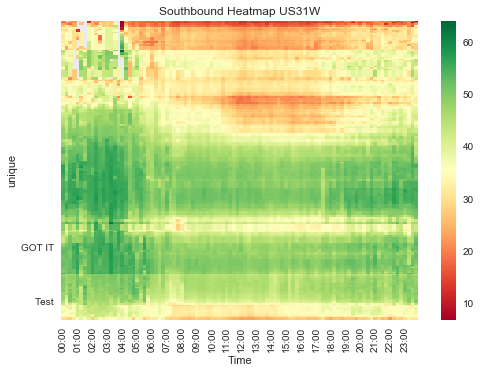

In [107]:
Heatmap_SB = sns.heatmap(pt_SB, cmap = 'RdYlGn', xticklabels = 4, yticklabels = 1000)
Heatmap_SB.set_yticks([700,2700]) #Be careful, because the direction of travel goes downward for southbound traffic
Heatmap_SB.set_yticklabels(["Test",'GOT IT'])
Heatmap_SB.set_title('Southbound Heatmap US31W')